# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 589


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#Set units for search
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)
       
        # Parse the JSON and retrieve data
        city_weather = response.json()
       
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | saquarema
Processing Record 3 of Set 1 | songyang
Processing Record 4 of Set 1 | akureyri
Processing Record 5 of Set 1 | altamont
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | hotan
Processing Record 8 of Set 1 | port lincoln
Processing Record 9 of Set 1 | kapa'a
Processing Record 10 of Set 1 | ibaiti
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | menongue
Processing Record 15 of Set 1 | nantucket
Processing Record 16 of Set 1 | barra de santo antonio
Processing Record 17 of Set 1 | iskateley
Processing Record 18 of Set 1 | wellington
Processing Record 19 of Set 1 | mirnyy
Processing Record 20 of Set 1 | mamuju
Processing Record 21 of Set 1 | qaqortoq
Processing Record 22 of Set 1 | puerto natales
Processing Record 23 of Set 1 | cockbu

Processing Record 41 of Set 4 | chonchi
Processing Record 42 of Set 4 | chernyshevskiy
Processing Record 43 of Set 4 | gizo
Processing Record 44 of Set 4 | cayeli
Processing Record 45 of Set 4 | west island
Processing Record 46 of Set 4 | yigo village
Processing Record 47 of Set 4 | kailua-kona
Processing Record 48 of Set 4 | nabire
Processing Record 49 of Set 4 | whitehorse
Processing Record 0 of Set 5 | newman
Processing Record 1 of Set 5 | mandera
Processing Record 2 of Set 5 | labin
Processing Record 3 of Set 5 | amga
Processing Record 4 of Set 5 | san antonio de pale
Processing Record 5 of Set 5 | saipan
Processing Record 6 of Set 5 | weno
Processing Record 7 of Set 5 | xianju
Processing Record 8 of Set 5 | west bay
Processing Record 9 of Set 5 | dhidhdhoo
Processing Record 10 of Set 5 | midvagur
Processing Record 11 of Set 5 | san patricio
Processing Record 12 of Set 5 | bereeda
Processing Record 13 of Set 5 | ishigaki
Processing Record 14 of Set 5 | vilyuchinsk
Processing Record

City not found. Skipping...
Processing Record 34 of Set 8 | birjand
Processing Record 35 of Set 8 | afaahiti
Processing Record 36 of Set 8 | mosjoen
Processing Record 37 of Set 8 | sao jose da coroa grande
Processing Record 38 of Set 8 | moundou
Processing Record 39 of Set 8 | tabou
Processing Record 40 of Set 8 | kaiapoi
Processing Record 41 of Set 8 | tocopilla
Processing Record 42 of Set 8 | touros
Processing Record 43 of Set 8 | nsanje
Processing Record 44 of Set 8 | tambopata
Processing Record 45 of Set 8 | ussel
Processing Record 46 of Set 8 | serebryanyye prudy
Processing Record 47 of Set 8 | huanren
Processing Record 48 of Set 8 | kirensk
Processing Record 49 of Set 8 | anna regina
Processing Record 0 of Set 9 | lasem
Processing Record 1 of Set 9 | lubao
Processing Record 2 of Set 9 | itabira
Processing Record 3 of Set 9 | agdas
Processing Record 4 of Set 9 | bethanie
Processing Record 5 of Set 9 | olyokminsk
Processing Record 6 of Set 9 | del rio
Processing Record 7 of Set 9 |

Processing Record 19 of Set 12 | taseyevo
Processing Record 20 of Set 12 | muriti
Processing Record 21 of Set 12 | trujillo
Processing Record 22 of Set 12 | volgorechensk
Processing Record 23 of Set 12 | ray
Processing Record 24 of Set 12 | moose jaw
Processing Record 25 of Set 12 | auki
Processing Record 26 of Set 12 | tyre
Processing Record 27 of Set 12 | jinka
Processing Record 28 of Set 12 | junagarh
Processing Record 29 of Set 12 | booue
Processing Record 30 of Set 12 | nkove
Processing Record 31 of Set 12 | boyolangu
Processing Record 32 of Set 12 | richards bay
Processing Record 33 of Set 12 | katsuren-haebaru
Processing Record 34 of Set 12 | thurso
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
print(city_data)

[{'City': 'lebu', 'Lat': -37.6167, 'Lng': -73.65, 'Max Temp': 12.14, 'Humidity': 75, 'Cloudiness': 3, 'Wind Speed': 6.66, 'Country': 'CL', 'Date': 1701211098}, {'City': 'saquarema', 'Lat': -22.92, 'Lng': -42.5103, 'Max Temp': 24.08, 'Humidity': 93, 'Cloudiness': 98, 'Wind Speed': 6.97, 'Country': 'BR', 'Date': 1701211098}, {'City': 'songyang', 'Lat': 34.4553, 'Lng': 113.0281, 'Max Temp': 5.55, 'Humidity': 39, 'Cloudiness': 100, 'Wind Speed': 2.52, 'Country': 'CN', 'Date': 1701211098}, {'City': 'akureyri', 'Lat': 65.6835, 'Lng': -18.0878, 'Max Temp': -0.04, 'Humidity': 100, 'Cloudiness': 75, 'Wind Speed': 0, 'Country': 'IS', 'Date': 1701211099}, {'City': 'altamont', 'Lat': 42.2068, 'Lng': -121.7372, 'Max Temp': 9.87, 'Humidity': 42, 'Cloudiness': 0, 'Wind Speed': 1.54, 'Country': 'US', 'Date': 1701211099}, {'City': 'utrik', 'Lat': 11.2278, 'Lng': 169.8474, 'Max Temp': 27.49, 'Humidity': 77, 'Cloudiness': 87, 'Wind Speed': 8.5, 'Country': 'MH', 'Date': 1701211099}, {'City': 'hotan', 'Lat

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =pd.DataFrame.from_dict(city_data)
# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lebu,-37.6167,-73.6500,12.14,75,3,6.66,CL,1701211098
1,saquarema,-22.9200,-42.5103,24.08,93,98,6.97,BR,1701211098
2,songyang,34.4553,113.0281,5.55,39,100,2.52,CN,1701211098
3,akureyri,65.6835,-18.0878,-0.04,100,75,0.00,IS,1701211099
4,altamont,42.2068,-121.7372,9.87,42,0,1.54,US,1701211099


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,12.14,75,3,6.66,CL,1701211098
1,saquarema,-22.9200,-42.5103,24.08,93,98,6.97,BR,1701211098
2,songyang,34.4553,113.0281,5.55,39,100,2.52,CN,1701211098
3,akureyri,65.6835,-18.0878,-0.04,100,75,0.00,IS,1701211099
4,altamont,42.2068,-121.7372,9.87,42,0,1.54,US,1701211099


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

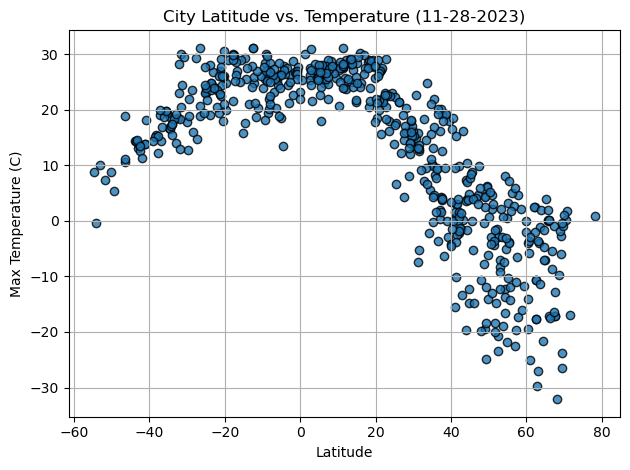

In [20]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, edgecolors="k")
date = datetime.now()
date = date.strftime("%m-%d-%Y")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

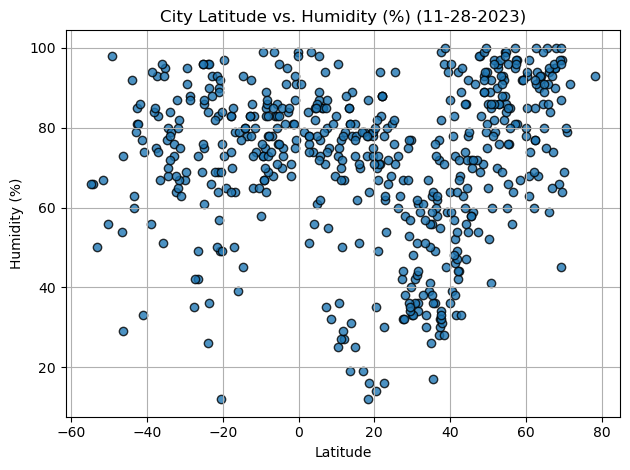

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, edgecolors="k")
date = datetime.now()
date = date.strftime("%m-%d-%Y")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

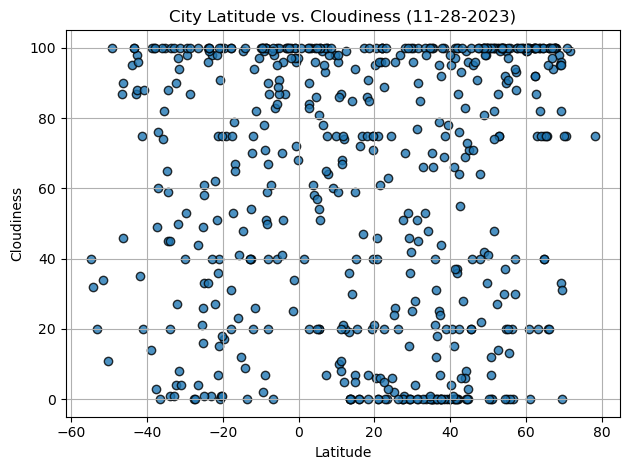

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=.8, edgecolors="k")

#Format date from UTC to m/d/y
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True) 
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

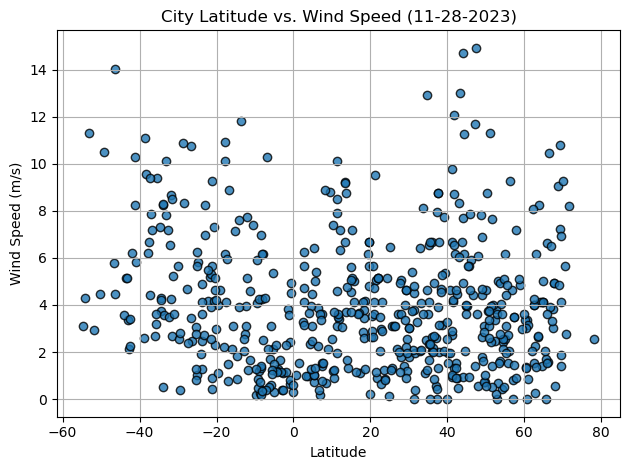

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, edgecolors="k")

date = datetime.now()
date = date.strftime("%m-%d-%Y")
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True) 
plt.tight_layout()


# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,songyang,34.4553,113.0281,5.55,39,100,2.52,CN,1701211098
3,akureyri,65.6835,-18.0878,-0.04,100,75,0.00,IS,1701211099
4,altamont,42.2068,-121.7372,9.87,42,0,1.54,US,1701211099
5,utrik,11.2278,169.8474,27.49,77,87,8.50,MH,1701211099
6,hotan,37.0997,79.9269,1.88,28,25,0.58,CN,1701211099


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lebu,-37.6167,-73.6500,12.14,75,3,6.66,CL,1701211098
1,saquarema,-22.9200,-42.5103,24.08,93,98,6.97,BR,1701211098
7,port lincoln,-34.7333,135.8667,16.77,77,65,7.32,AU,1701211099
9,ibaiti,-23.8486,-50.1878,19.08,96,100,2.49,BR,1701211100
10,grytviken,-54.2811,-36.5092,-0.41,66,32,4.28,GS,1701211100


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.8549167771714705
-----------------------------------
Observations about linear relationship:
The regression displays a negative relationship between temperature and latitude
In the northern hemisphere, as the latitude increases the distance from the equator increases
As you move away from the equator, the max temperature decreases.


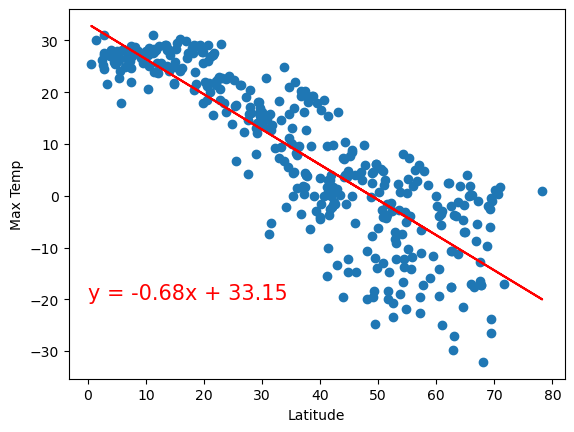

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The regression displays a negative relationship between temperature and latitude")
print("In the northern hemisphere, as the latitude increases the distance from the equator increases")
print("As you move away from the equator, the max temperature decreases.")

The r-value is 0.6987801078055327
-----------------------------------
Observations about linear relationship:
The regression displays a sligtly positive relationship between temperature and latitude.
In the southern hemisphere, as the latitude increases the distance from the equator decreases
As you move closer to the equator, the max temperature generally increases.


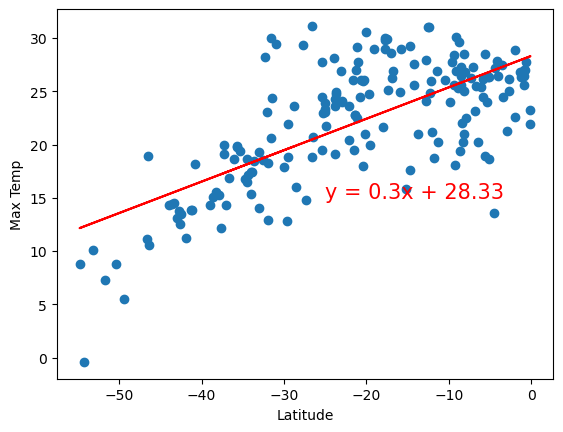

In [33]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The regression displays a sligtly positive relationship between temperature and latitude.")
print("In the southern hemisphere, as the latitude increases the distance from the equator decreases")
print("As you move closer to the equator, the max temperature generally increases.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.2884085293833071
-----------------------------------
Observations about linear relationship:
The relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude


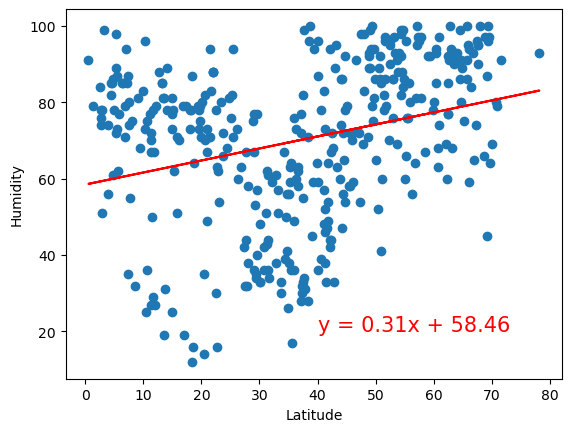

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The relationship is slightly positive, though there doesn't appear to be a strong coorelation between humidity and latitude")

The r-value is 0.20334621047503795
-----------------------------------
Observations about linear relationship:
The relationship is slightly positive.
Humidity increases as cities get closer to the equator.


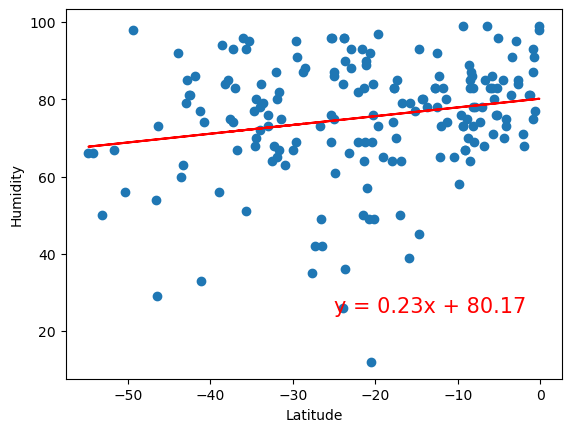

In [35]:
# Southern Hemisphere
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("The relationship is slightly positive.")
print("Humidity increases as cities get closer to the equator.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.1594561516181811
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and cloudiness.


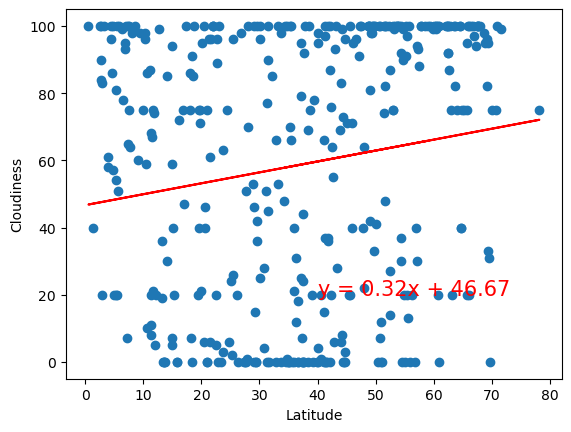

In [36]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and cloudiness.")

The r-value is 0.1551470856961101
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and cloudiness.


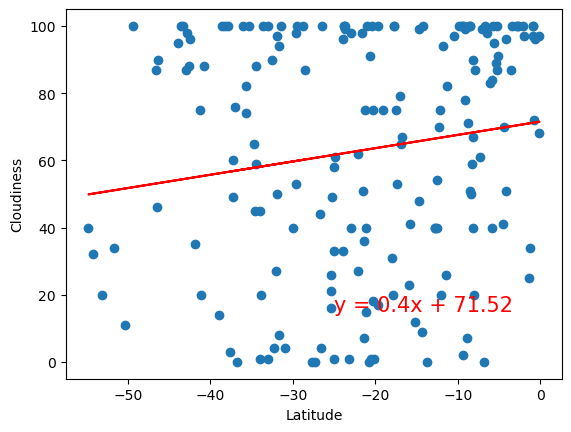

In [37]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and cloudiness.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0474955289302679
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and wind speed.


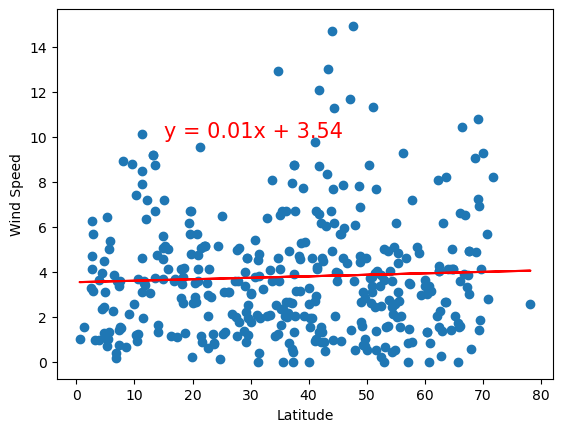

In [38]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and wind speed.")

The r-value is -0.43938724484807257
-----------------------------------
Observations about linear relationship:
There does not appear to be a coorelation between latitude and wind speed.


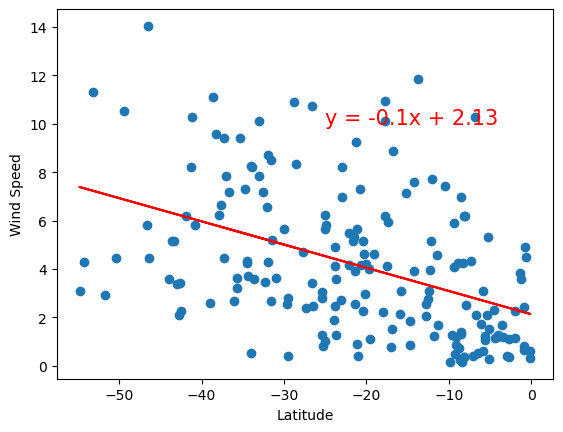

In [39]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")
print("Observations about linear relationship:")
print("There does not appear to be a coorelation between latitude and wind speed.")

**Discussion about the linear relationship:** YOUR RESPONSE HERE